# Linear regression

In [1]:
#Import all the modules you will need in this notebook here:
# Imported all I ever imagined to need in the exercise.
import statsmodels.api as sm
import statsmodels
import urllib.request
from lxml import etree
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import pandas as pd
import os
import scipy
import urllib.request
import scipy
from sklearn.feature_extraction.text import CountVectorizer
import re
import gzip
import numpy as np
import os
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot



In [2]:
# exercise 0
# Put your solution here!
import statsmodels.api as sm # Somehow I have to import libraries again and again.
import statsmodels
import pandas as pd
## This will read csv file. As you know server needs src and local dont.
try:
    data=pd.read_csv("src/fram.txt",sep="\t")
except:
    data=pd.read_csv("fram.txt",sep="\t")


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [3]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
import pandas as pd

# Server give me error so ex0 importing is done here again.
try:
    fram=pd.read_csv("src/fram.txt",sep="\t")
except:
    fram=pd.read_csv("fram.txt",sep="\t")
# Lets use describe to see data from fram.txt
fram.describe()



,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [4]:
# exercise 2
# Put your solution here!




def rescale(sarja):
    import pandas as pd
    import numpy as np
    sarja1=sarja-sarja.mean()   #Centralizing
    sarja1=sarja1/(2*sarja1.std()) # Scaling
    return sarja1



Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [5]:
# exercise 3
# Put your solution here!
colnames=fram.columns # Colnames from fram
colnames2=[]
df2=[]
## I had hard time with some simple errors. I am not proud of this code but didnt have time to clean it.
df2=pd.DataFrame(rescale(fram.iloc[:,2])) ##Creating centralized and scaled dataframe.
df2=df2.rename(columns={"AGE":"sAGE"}) # I had to do first before loop
for x in colnames:  #colnames
    colnames2.append("s"+x) # This add column name s and save it to list colnames2


for i in range(3,10):
    df2[colnames2[i]]=rescale(fram.iloc[:,i]) # add s marked column names to DF2

df2=df2.drop(columns=['sSBP10','sCHD']) # These we dont need in this excercise.
fram = pd.concat([fram, df2], axis=1, sort=False) # This add our new dataframe to original dataframe.





Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [6]:
# exercise 4
# Put your solution here!

import statsmodels.formula.api as smf
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit() #This was pretty simple for linear regression. Like R or other language.
print(fit.summary()) ## Command print we could delete I think.




OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           4.13e-40
Time:                        12:50:18   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.95

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [7]:
# exercise 5
# Put your solution here!
import statsmodels.formula.api as smf
fit=smf.ols('SBP ~ sAGE + sFRW + SEX + sCHOL', data=fram).fit() # 
fit.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.44e-46
Time:                        12:50:18   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Your solution here: R2 adj 0.123-> 0.144. Weight explains most.

***

Try to add to the model all the interactions with other variables. 

In [8]:
# exercise 6
# Put your solution here!
import statsmodels.formula.api as smf
fit=smf.ols('SBP ~ sAGE + sFRW + SEX + sCHOL + sFRW:sAGE + sAGE:SEX+ sAGE:sCHOL + sFRW:SEX + sFRW:sCHOL + SEX:sCHOL', data=fram).fit()
print(fit.params) # Was useful later see parameters how they act.


Intercept            150.543854
SEX[T.male]           -4.730869
sAGE                  10.218851
sAGE:SEX[T.male]      -4.292337
sFRW                  16.644973
sFRW:SEX[T.male]       1.667323
sCHOL                  3.618124
SEX[T.male]:sCHOL      1.023083
sFRW:sAGE             -2.086574
sAGE:sCHOL            -4.756423
sFRW:sCHOL             4.972936
dtype: float64


Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

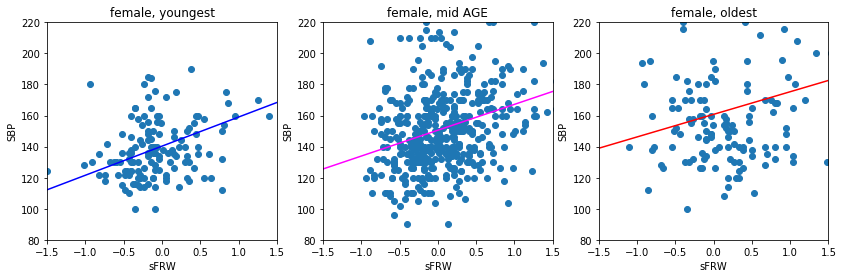

In [9]:
# exercise 7
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

p=fit.params # We save parameters to variable p.

# Subplot function.
fig, ax = plt.subplots(1,3, subplot_kw={"xlim": (-1.5, 1.5), "ylim": (80,220),"xlabel": "sFRW", "ylabel": "SBP"},figsize=(14, 4))

#Plot 1
ax[0].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE < -0.5)],fram.SBP[(fram.SEX=="female") & (fram.sAGE < -0.5)])
ax[0].set_title("female, youngest")

#Line for plot
abline_plot(p.Intercept - p["sAGE"],p.sFRW - p["sFRW:sAGE"], color="blue", label="low",ax=ax[0])

#Plot 2
ax[1].set_title("female, mid AGE")
ax[1].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE >-0.5)& (fram.sAGE <0.5)],fram.SBP[(fram.SEX=="female") & (fram.sAGE >-0.5) & (fram.sAGE <0.5)])
abline_plot(p.Intercept, p.sFRW, color="magenta", label="mid", ax=ax[1])

#Plot 3
ax[2].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE > 0.5)],fram.SBP[(fram.SEX=="female") & (fram.sAGE > 0.5)])
abline_plot(p.Intercept + p["sAGE"],p.sFRW + p["sFRW:sAGE"], color="red", label="high", ax=ax[2])
ax[2].set_title("female, oldest")

##TMC Tricks. I am not proud of that, but wanted to continue.
a=[0,0]
plt.scatter(a,a)
plt.scatter(a,a)
plt.scatter(a,a)



How does the dependence of blood pressure on weight change as a person gets older?
***

Your solution here. Blood pressure is higher when person is older. For older people weight are not affecting as much as for middle age or young person.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

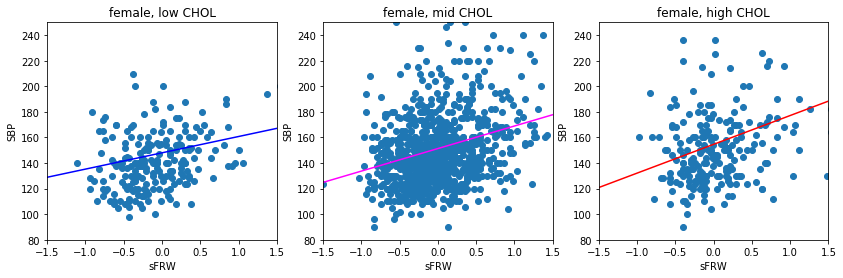

In [10]:
# exercise 8
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot


## Model
fit=smf.ols('SBP ~ sAGE + sFRW + SEX + sCHOL + sFRW:sAGE + sAGE:SEX+ sAGE:sCHOL + sFRW:SEX + sFRW:sCHOL + SEX:sCHOL+ sCIG+ SEX:sCIG + sCHOL:sCIG+ sFRW:sCIG+ sAGE:sCIG', data=fram).fit()
p=fit.params

#print(p)
#We see sFRW has highest value -> Its most important coefficient.

# Subplot preparing
fig, ax = plt.subplots(1,3, subplot_kw={"xlim": (-1.5, 1.5), "ylim": (80,250),
"xlabel": "sFRW", "ylabel": "SBP"},
figsize=(14, 4))

##PLot1
ax[0].scatter(fram.sFRW[(fram.sCHOL < -0.5)],fram.SBP[(fram.sCHOL < -0.5)])
abline_plot(p.Intercept - p["sCHOL"],p.sFRW - p["sFRW:sCHOL"], color="blue", label="low", ax=ax[0])
ax[0].set_title("female, low CHOL")

## Plot 2
ax[1].scatter(fram.sFRW[(fram.sCHOL>-0.5)&(fram.sCHOL<0.5)],fram.SBP[(fram.sCHOL>-0.5)&(fram.sCHOL<0.5)])
abline_plot(p.Intercept, p.sFRW, color="magenta", label="mid", ax=ax[1])
ax[1].set_title("female, mid CHOL")


## Plot 3
ax[2].scatter(fram.sFRW[(fram.sCHOL> 0.5)],fram.SBP[(fram.sCHOL> 0.5)])
abline_plot(p.Intercept + p["sCHOL"],p.sFRW + p["sFRW:sCHOL"], color="red", label="high", ax=ax[2])
ax[2].set_title("female, high CHOL")



##TMC Tricks. I am not proud but tried couple other ways and didnt succees. Show must go on.
a=[0,0]
plt.scatter(a,a)
plt.scatter(a,a)
plt.scatter(a,a)



How does the model and its accuracy look?

***

Your solution here. Model and accuracy looks pretty nice. It seems that high colesterol level is rising SBP with normal weight or overweight personel.

***

# Logistic regression

In [11]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [12]:
# exercise 9
# Put your solution here!
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
##Lets create true/false vector to fram
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int) # True/false to 1 or 0
fram["HIGH_BP"] = fram["HIGH_BP"].astype('int') # This was important, otherwise TMC will revenge you.

## Binomial fit
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sFRW:SEX", data=fram,family=sm.families.Binomial()).fit()

## ERRO RATE ORIG
error_rate_orig =np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [13]:
# exercise 10
# Put your solution here!
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Now sAGE with interactions are added.
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + sAGE:sFRW +sAGE:SEX + sFRW:SEX", data=fram,family=sm.families.Binomial()).fit()

## ERRO RATE ORIG

error_rate =np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

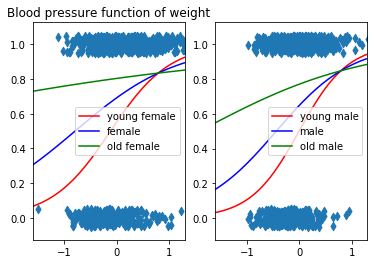

In [14]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Now sAGE with interactions are added.
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + sAGE:sFRW +SEX:sAGE + SEX:sFRW", data=fram,family=sm.families.Binomial()).fit()

p=fit.params


fig,ax=plt.subplots(1,2,subplot_kw={"xlim": (-1.6, 1.3)})


# Visualization of the model

#ax[0].scatter(fram.sFRW, fram.HIGH_BP, marker="d")
X=np.linspace(-2, 4, 100)


ax[0].set_title("Probability to high blood pressure function of weight")
ax[0].scatter(fram.sFRW[((fram.SEX=="female"))],fram.HIGH_BP[(fram.SEX=="female")] +
              np.random.uniform(-0.05, 0.05, len(fram[fram.SEX=="female"])),marker='d')


######### FIGURE 1 ###############
# YOUNG
ax[0].plot(X, logistic(X*(p.sFRW-p['sAGE:sFRW']) + p.Intercept - p['sAGE']), color="red", label="young female")

# MILF Age
ax[0].plot(X, logistic(X*p.sFRW + p.Intercept), color="blue", label="female")

# GILF Age
ax[0].plot(X, logistic(X*(p.sFRW+p['sAGE:sFRW']) + p.Intercept+p['sAGE']), color="green", label="old female")

ax[0].legend()


############# FIGURE 2 ####################
ax[1].scatter(fram.sFRW[((fram.SEX=="male"))],fram.HIGH_BP[(fram.SEX=="male")] +
              np.random.uniform(-0.05, 0.05, len(fram[fram.SEX=="male"])),marker='d')


# Young
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]-p['sAGE:sFRW']) +p["SEX[T.male]"]-p['sAGE'] + p.Intercept),color="red",label="young male")

# Mid Age

ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) +p["SEX[T.male]"] + p.Intercept),color="blue",label="male")


# John McAfee age personel

ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]+p['sAGE:sFRW'])+p['sAGE'] +p["SEX[T.male]"] + p.Intercept),color="green",label="old male")

ax[1].legend()




How do the models with different ages and genders differ from each other?

***
Your solution here. I rather be old and fat male than old and fat female. Overall better to be young men.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [15]:
# exercise 12
# Put your solution here!
import pandas as pd
import numpy as np

## There is train_test_split also in sklearn. Mainly important split data randomly while measuring model accuracy.
def train_test_split(df,train_fraction=0.8):
    train=df.sample(frac=train_fraction) #random state is a seed value
    test=df.drop(train.index) # Drop double index
    return train,test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [16]:
# exercise 13
np.random.seed(1)
# Put your solution here!
import statsmodels.formula.api as smf
import numpy as np
error_model=[]
error_null=[]

for i in range(100):  # Fill up error model and error null with values. We compare here train data results to test data. 
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + sAGE:SEX", data=train,family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit() # Here we use train data 
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

print(np.mean(error_model), pd.Series(error_null).mean())



0.3311827956989247 0.3488530465949821


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [1]:
# exercise 14
# Put your solution here!

# Lets make again 1 or 0 value for people who have or not have CHD.
fram["hasCHD"] = (fram.CHD >0) 
fram.hasCHD = fram.hasCHD.map(int) #From true false to digital.
fram["hasCHD"]=fram['hasCHD'].astype('int') # Fear of the TMC......... Fear of the TMC.... I have a phobia that someone's always there
fram.hasCHD.mean()




NameError: name 'fram' is not defined

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [21]:
# exercise 15
# Put your solution here!
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Now sAGE with interactions are added.
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sFRW + sCHOL:sCIG + sFRW:sCIG", data=fram,family=sm.families.Binomial()).fit()

## ERRO RATE ORIG

error_rate =np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD))

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

Text(0, 0.5, 'hasCHD')

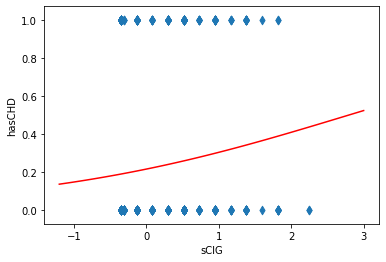

In [28]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
import matplotlib.pyplot as plt
#print(fit.params)
# It seems sCIG is most important explanator

plt.scatter(fram.sCIG,fram.hasCHD,marker="d")
X=np.linspace(-1.2,3,100)
plt.plot(X,logistic(X*fit.params.sCIG+fit.params.Intercept),color="red")
plt.xlabel("sCIG")
plt.ylabel("hasCHD")


## IF someone has read excercise this long you are tough person!:)

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here. I am not happy for this model. I wont start smoking but I somehow it seems smoking cigarettes only rise a little bit probability to get CHD
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [43]:
# exercise 17
# Put your solution here!
cigarettes = (17 - fram.CIG.mean()) / (fram.CIG.std() * 2)
weight = (100 - fram.FRW.mean()) / (fram.FRW.std() * 2)
chol = (200 - fram.CHOL.mean()) / (fram.CHOL.std() * 2)
point = {"sCHOL": chol,"sCIG": cigarettes,"sFRW": weight}
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW+ sCHOL:sCIG +sCHOL:sFRW+sFRW:sCIG",data=fram,family=sm.families.Binomial()).fit()
predicted = float(fit.predict(point)[0])

### OFFTOPIC ###
# Hanoi Rocks Beer & Cigarette song is one of my favourite. Thank god I dont smoke anymore. But will have soon Heinkein if I manage to send this to moodle.


0.2161616602504101
